<a href="https://colab.research.google.com/github/amandeep0/gec/blob/master/text_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import urllib.request
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


In [4]:
url_1 = "http://gutenberg.ca/ebooks/hemingwaye-sunalsorises/hemingwaye-sunalsorises-00-t.txt"
file_1 = urllib.request.urlopen(url_1).read()

url_2 = "http://gutenberg.ca/ebooks/hemingwaye-menwithoutwomen/hemingwaye-menwithoutwomen-00-t.txt"
file_2 = urllib.request.urlopen(url_2).read()

url_3 = "http://gutenberg.ca/ebooks/hemingwaye-acrosstheriver/hemingwaye-acrosstheriver-00-t.txt"
file_3 = urllib.request.urlopen(url_3).read()

url_4 = "http://gutenberg.ca/ebooks/hemingwaye-oldmanandthesea/hemingwaye-oldmanandthesea-00-t.txt"
file_4 = urllib.request.urlopen(url_4).read()




In [5]:
df = pd.DataFrame({'id':[1,2,3,4], 'text':[file_1,file_2,file_3,file_4], 'year':[1926, 1927,1950,1952]})
df.head()

,id,text,year
0,1,b'\n* A Project Gutenberg Canada Ebook *\n\nTh...,1926
1,2,b'\n* A Project Gutenberg Canada Ebook *\n\nTh...,1927
2,3,b'\n* A Project Gutenberg Canada Ebook *\n\nTh...,1950
3,4,b'\n* A Project Gutenberg Canada Ebook *\n\nTh...,1952


In [16]:
import re
# Remove punctuation
df['book_text_processed'] = df['text'].map(lambda x: re.sub('[,\.!?*]', '', str(x)[4:]))
# Convert the titles to lowercase
df['book_text_processed'] = df['book_text_processed'].replace(r'\\n',' ', regex=True) 
df['book_text_processed'] = df['book_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
df['book_text_processed'].head()


0     a project gutenberg canada ebook   this ebook...
1     a project gutenberg canada ebook   this ebook...
2     a project gutenberg canada ebook   this ebook...
3     a project gutenberg canada ebook   this ebook...
Name: book_text_processed, dtype: object

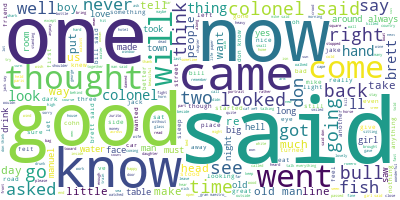

In [17]:
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['book_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()


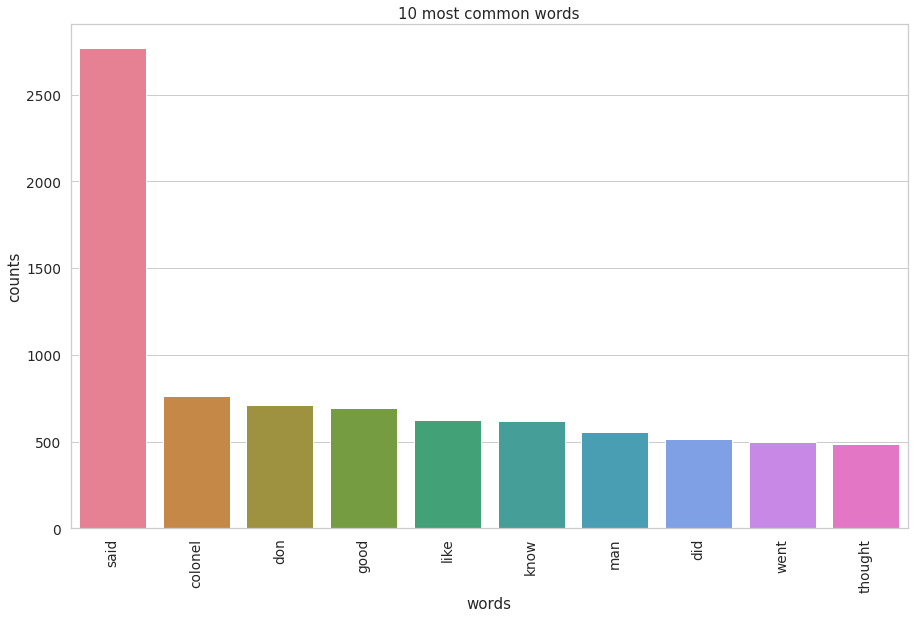

In [18]:
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['book_text_processed'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)


In [19]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
said colonel good know like don thought girl think did

Topic #1:
fish man old said thought line water boy hand great

Topic #2:
domain _la posted links drawing lip download gutenbergca updated apply

Topic #3:
said brett went don mike bull good cohn like know

Topic #4:
said jack manuel bull don got right good says looked


In [27]:
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
import os
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
#if 1 == 1:
LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
#with open(LDAvis_data_filepath, 'w') as f:
#  pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
#with open(LDAvis_data_filepath) as f:
#    LDAvis_prepared = pickle.load(f)


In [28]:
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')
